# 機械学習  
## ロジスティック回帰  

- 分類問題  
 1. 識別的アプローチ  
 $p(C_k|\mathbb{x})$を直接モデル化する。（ロジスティック回帰はこれ）  
 識別関数の構成もある。(SVMなど）
 2. 生成的アプローチ  
 $p(C_k)$と$p(\mathbb{x}|C_k)$をモデル化し、その後、ベイズの定理を用いて,$p(C_k|\mathbb{x})$を求める。  
$$
p(C_k|\mathbb{x})=\frac{C_k,\mathbb{x})}{p(\mathbb{x})} = \frac{p(\mathbb{x}|C_k)p(C_k)}{p(\mathbb{x})}
$$

※ロジスティック回帰は分類問題（数値を予想するものではない）  

- 回帰を利用した分類  
線形回帰を利用しようとすると、$x^Tw\in\mathbf{R}$であるが、$y\in\{ 0,1 \}$であるため、実数全体を値域とするのは都合が悪い。  
そこで、実数全体から、[0,1]への写像をなす関数を考える。  
具体的にはシグモイド関数を使う。  
$$
\sigma (z) :=\frac{1}{1+e^{-z}}
$$  
こうすることで、確率とみなすことができる。  
- ロジスティック関数  
線形結合をシグモイド関数の引数とすることで分類を行う。

- シグモイド関数の微分
$$
\frac{d}{dz}\sigma (z)=\sigma (z)(1-\sigma (z))
$$

- ロジスティック回帰の考え方  
シグモイド関数の出力をY=1になる確率に対応させる（ように、パラメータ$\mathbb{w}$を決める）  
出力としてほしいのは、
$$
P(Y=1|\mathbb{x}) =\sigma (\mathbb{x}^T\mathbb{w})
$$
通常は、閾値を0.5として、それ以上ならY=1　以下ならY=0のように分類する。

- 尤度最大化の考え方  
分布の形状（すなわちパラメータの値）が分からず、現象を観測したとき、得られた現象から最も尤もらしいパラメータを推定値として利用する。  
ここで、最も尤もらしいとは、得られた現象が発生する確率を最大化するという意味である。  
例えば、ベルヌーイ分布に従う事象を繰り返し行った場合は
$$
P(y_1, y_2, ..., y_n;p) = \prod_{i=1}^np^{y_i}(1-p)^{1-y_i}
$$
が尤度関数となる。（実測値を使ってこれを最大化するpを求めると、そのようなpが裏にあるベルヌーイ分布のパラメータでありそうだと考えるということ）  
- ロジスティック回帰での尤度関数  
上記ベルヌーイ分布のpの値が、観測ごとに変化して、$\sigma{\mathbb{w}^T\mathbb{x}_i}$に置き換えればよく、得られた尤度関数はパラメータ$\mathbb{w}$の関数となる。  
$$
L(\mathbb{w}) = \prod_{i=1}^n\sigma (\mathbb{w}^T\mathbb{x}_i)^{y_i}(1-\sigma (\mathbb{w}^T\mathbb{x}_i))^{1-y_i}
$$
となり、これを最大化するパラメータを求める。
通常、$E=-\log L(\mathbb{w})$の最小化に置き換えて計算する。  
これによって、積を和に変換し、かつ桁落ちを防ぐことができる。

- 勾配降下法  
このEの最小値は解析的に求めることができない。候補となる$\mathbb{w}_i$の列を考えて、ステップごとに最小値に近づけていくことを考える。  
勾配降下法では、値の更新のために、Eを$\mathbb{w}$で微分した式が必要。
$$
E(\mathbb{w}) = -\log L(\mathbb{w})\\
\begin{eqnarray*}
\frac{\partial E(\mathbb{w})}{\partial \mathbb{w}} &=& -\sum_{i=1}^n\frac{\partial E_i}{\partial p_i}\frac{\partial p_i}{\partial z_i}\frac{\partial z_i}{\partial \mathbb{w}}\\
&=& -\sum_{i=1}^n (y_i-p_i)\mathbb{x}_i
\end{eqnarray*}
$$
この傾きを用いて、
$$
\mathbb{w}^{(k+1)} = \mathbb{w}^{(k)} + \eta\sum_{i=1}^n(y_i-p_i)\mathbb{x}_i
$$  
という重みの更新式を得る。

- 確率的勾配降下法  
全データで毎回値の更新をすると、データが多いときメモリを大量に消費し、かつ時間もかかる。  
そこで、1データずつあるいは少量のデータずつで更新していく。  

※※ コメント：ロジスティック回帰の実装の前に、ビデオが一部飛んでると思います。

## ロジスティック回帰の実装

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
titanic_df = pd.read_csv("./train.csv")

### データクレンジング

In [51]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [54]:
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
print(titanic_df[titanic_df.isnull().any(1)])

     Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked    AgeFill
5           0       3    male  NaN      0      0   8.4583        Q  29.699118
17          1       2    male  NaN      0      0  13.0000        S  29.699118
19          1       3  female  NaN      0      0   7.2250        C  29.699118
26          0       3    male  NaN      0      0   7.2250        C  29.699118
28          1       3  female  NaN      0      0   7.8792        Q  29.699118
..        ...     ...     ...  ...    ...    ...      ...      ...        ...
859         0       3    male  NaN      0      0   7.2292        C  29.699118
863         0       3  female  NaN      8      2  69.5500        S  29.699118
868         0       3    male  NaN      0      0   9.5000        S  29.699118
878         0       3    male  NaN      0      0   7.8958        S  29.699118
888         0       3  female  NaN      1      2  23.4500        S  29.699118

[179 rows x 9 columns]


### ロジスティック回帰

In [55]:
data1 = titanic_df.loc[:,["Fare"]].values
label1 = titanic_df.loc[:,["Survived"]].values.ravel()

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(data1,label1)

LogisticRegression()

In [59]:
display(model.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
model.predict([[100]])

array([1], dtype=int64)

In [61]:
model.predict_proba([[100]])

array([[0.35931275, 0.64068725]])

In [62]:
X_test_value = model.decision_function(data1)

In [63]:
print(model.intercept_)
print(model.coef_)

[-0.94131796]
[[0.01519666]]


In [64]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

In [65]:
def sigmoid(x):
    return 1/(1+np.exp(-(w_1*x+w_0)))

No handles with labels found to put in legend.


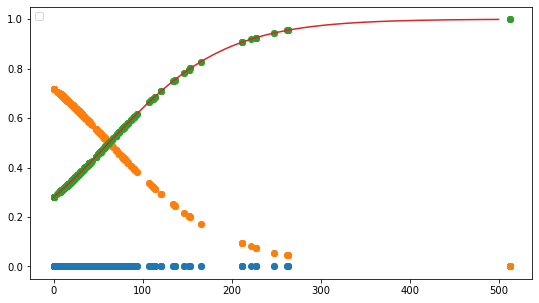

In [66]:
x_range=np.linspace(-1,500,3000)

plt.figure(figsize=(9,5))
plt.legend(loc=2)

plt.plot(data1,np.zeros(len(data1)),'o')
plt.plot(data1, model.predict_proba(data1),'o')
plt.plot(x_range, sigmoid(x_range),'-')
plt.show()    

### ロジスティック回帰：2変数

In [67]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female':0,'male':1}).astype(int)

In [68]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass']+titanic_df['Gender']

In [69]:
titanic_df2 = titanic_df.drop(['Pclass','Sex','Gender','Age'],axis=1)

In [70]:
titanic_df2.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


2変数からということなので、とりあえず、FareとAgeFillを使ってみる。

In [71]:
data2 = titanic_df2.loc[:,["Fare","AgeFill"]].values
label2 = titanic_df2.loc[:,["Survived"]].values.ravel()

In [72]:
model2 = LogisticRegression()

In [73]:
model2.fit(data2,label2)

LogisticRegression()

In [77]:
# 運賃100ドル、25歳の場合は生き残ると予想するかをチェック
model2.predict([[100, 25]])

array([1], dtype=int64)

In [78]:
# 上記条件で、生き残る確率を予想。
model2.predict_proba([[100, 25]])

array([[0.32583309, 0.67416691]])

In [79]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeFill,Gender,Pclass_Gender
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,0.647587,2.956229
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,0.477990,1.016323
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,0.000000,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,1.000000,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,1.000000,4.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,1.000000,4.000000


以下、30代男性の生き残る確率予測を行う。  
ここでは、'Gender'と'AgeFill'を用いて,'Servived'のロジスティック回帰を行う。

In [80]:
data3 = titanic_df.loc[:,["AgeFill","Gender"]].values
label3 = titanic_df.loc[:,["Survived"]].values.ravel()

In [81]:
model3 = LogisticRegression()

In [82]:
model3.fit(data3,label3)

LogisticRegression()

In [91]:
# 30代男性の生き残る確率予測を行う
for i in range(30,40):
    print(str(i) + "歳:",end = "")
    print("{:.5f}".format(model3.predict_proba([[i,1]])[0,1]))

30歳:0.19332
31歳:0.19244
32歳:0.19157
33歳:0.19070
34歳:0.18984
35歳:0.18898
36歳:0.18812
37歳:0.18726
38歳:0.18641
39歳:0.18555
